In [2]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [4]:
MaaSSim

<module 'MaaSSim' from 'C:\\Users\\farno\\OneDrive\\Documents\\GitHub\\MaaSSim\\MaaSSim\\__init__.py'>

In [3]:
sys.path

['C:\\Users\\farno\\OneDrive\\Documents\\GitHub\\MaaSSim\\docs\\Coevolution_Experiments',
 'C:\\Users\\farno\\anaconda3\\python39.zip',
 'C:\\Users\\farno\\anaconda3\\DLLs',
 'C:\\Users\\farno\\anaconda3\\lib',
 'C:\\Users\\farno\\anaconda3',
 '',
 'C:\\Users\\farno\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'C:\\Users\\farno\\anaconda3\\lib\\site-packages',
 'C:\\Users\\farno\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.9.egg',
 'C:\\Users\\farno\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\farno\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\farno\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\farno\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\farno\\.ipython',
 'C:\\Users\\farno\\OneDrive\\Documents\\GitHub\\MaaSSim']

In [3]:
module_path

'C:\\Users\\farno\\OneDrive\\Documents\\GitHub\\MaaSSim'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out, S_driver_opt_out, traveller_opt_out, S_traveller_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

In [5]:
import MaaSSim.day_to_day

In [4]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [5]:
df = pd.read_csv('data/dataframes/baseline_demand_100d_1000p.csv')
df

Unnamed: 0  EXPERIENCE_U     WOM_U  MARKETING_U   OUT       rh_U  \
0              0      0.010000  0.010000     0.011646   0.0        NaN   
1              1      0.010000  0.010000     0.013414   2.0 -33.016994   
2              2      0.010000  0.010001     0.015495   7.0 -28.027183   
3              3      0.010009  0.010002     0.018206   9.0 -18.644781   
4              4      0.010021  0.010004     0.020961  12.0 -13.456481   
...          ...           ...       ...          ...   ...        ...   
1995        1995      0.021396  0.072596     0.428893  64.0 -15.027413   
1996        1996      0.021301  0.072454     0.428893  55.0 -19.417503   
1997        1997      0.021213  0.072563     0.428893  54.0 -18.746196   
1998        1998      0.021116  0.072650     0.428893  55.0 -19.634174   
1999        1999      0.021332  0.072743     0.428893  35.0 -12.954188   

          alt_U  ACTUAL_WT     U_dif   mu  ...  ACCEPTS_OFFER  REJECTS_OFFER  \
0           NaN        NaN       NaN  NaN  ...            NaN            NaN   
1    -11.833077  10.250000  1.780092  1.0  ...       0.000000            0.0   
2    -12.047223  10.250000  1.376004  1.0  ...       0.000000            0.0   
3    -10.704999   7.251852  1.187671  1.0  ...      10.000000            0.0   
4    -11.187001   8.863889  0.217294  1.0  ...      13.750000            0.0   
...         ...        ...       ...  ...  ...            ...            ...   
1995 -10.783314   9.759115  0.567390  1.0  ...       8.437500            0.0   
1996 -11.800476  11.854848  0.697088  1.0  ...       3.818182            0.0   
1997 -11.982619  11.620988  0.609536  1.0  ...       2.500000            0.0   
1998 -11.696199  12.030606  0.964954  1.0  ...       4.054545            0.0   
1999 -11.860098   7.087143  0.111166  1.0  ...      12.457143            0.0   

      ARRIVES_AT_PICKUP  MEETS_DRIVER_AT_PICKUP  DEPARTS_FROM_PICKUP  \
0                   NaN                     NaN                  NaN   
1              0.000000                0.000000             0.000000   
2              0.000000                0.000000             0.000000   
3             13.333333              230.111111            20.000000   
4             20.000000              494.416667            30.000000   
...                 ...                     ...                  ...   
1995          17.500000              425.656250            26.250000   
1996          12.727273              385.600000            19.090909   
1997          13.333333              333.814815            20.000000   
1998          12.363636              377.272727            18.545455   
1999          19.428571              380.714286            29.142857   

      ARRIVES_AT_DROPOFF  SETS_OFF_FOR_DEST  ARRIVES_AT_DEST  \
0                    NaN                NaN              NaN   
1               0.000000           0.000000              0.0   
2               0.000000           0.000000              0.0   
3             292.666667           6.666667              0.0   
4             595.916667          10.000000              0.0   
...                  ...                ...              ...   
1995          492.046875           8.750000              0.0   
1996          344.909091           6.363636              0.0   
1997          363.296296           6.666667              0.0   
1998          382.000000           6.181818              0.0   
1999          557.228571           9.714286              0.0   

      PREFERS_OTHER_SERVICE  LOSES_PATIENCE  
0                       NaN             NaN  
1                       0.0      615.000000  
2                       0.0      615.000000  
3                       0.0      205.000000  
4                       0.0        0.000000  
...                     ...             ...  
1995                    0.0       76.875000  
1996                    0.0      223.636364  
1997                    0.0      205.000000  
1998                    0.0      234.818182  
1999            

In [13]:
d=1800
nd = list(df.OUT[d:d+100]/1000)
sum(nd)/len(nd)

0.054449999999999985

In [14]:
nd

[0.039,
 0.049,
 0.043,
 0.049,
 0.057,
 0.053,
 0.053,
 0.059,
 0.055,
 0.049,
 0.053,
 0.057,
 0.057,
 0.053,
 0.044,
 0.053,
 0.053,
 0.052,
 0.063,
 0.059,
 0.05,
 0.047,
 0.064,
 0.057,
 0.06,
 0.043,
 0.039,
 0.066,
 0.05,
 0.056,
 0.054,
 0.058,
 0.055,
 0.044,
 0.056,
 0.054,
 0.045,
 0.056,
 0.047,
 0.054,
 0.059,
 0.046,
 0.06,
 0.059,
 0.055,
 0.055,
 0.065,
 0.05,
 0.052,
 0.06,
 0.052,
 0.053,
 0.047,
 0.043,
 0.064,
 0.06,
 0.056,
 0.061,
 0.05,
 0.065,
 0.066,
 0.064,
 0.055,
 0.06,
 0.054,
 0.044,
 0.057,
 0.053,
 0.042,
 0.053,
 0.054,
 0.065,
 0.053,
 0.058,
 0.052,
 0.054,
 0.063,
 0.047,
 0.05,
 0.063,
 0.061,
 0.059,
 0.061,
 0.055,
 0.053,
 0.057,
 0.049,
 0.058,
 0.066,
 0.048,
 0.049,
 0.065,
 0.039,
 0.063,
 0.053,
 0.053,
 0.066,
 0.053,
 0.055,
 0.058]

In [5]:
# the setting for TRB results do not delete
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 20000 #meter
params.dist_threshold_min = 3000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_att = 0.01
params.d2d.B_income = 1

params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 2 #1.5 in Oded's paper
params.PT_fare = 1 ## euro
params.PT_avg_speed = 6

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro 
params.platforms.fare = float(1.2)# float(1.20) #euro/km #http://taxihowmuch.com/
params.platforms.min_fare = float(2) # euro #http://taxihowmuch.com/
params.d2d.fuel_cost = 0.25 #euro/km #https://help.ubercarshare.com/hc/en-gb/articles/360022882131-Choosing-your-car-s-distance-rate  
params.platforms.comm_rate = float(0.10) # float(0.20) for baseline
params.platforms.discount = float(0.0) 
params.platforms.daily_marketing = False
params.platforms.incentive = float(0.0)

params.d2d.learning_d = 1 
params.d2d.B_Experience = 0.80
params.d2d.B_WOM = 0.18
params.d2d.B_Marketing = 0.02
params.d2d.diffusion_speed = 10/100 
params.d2d.m = 5
params.d2d.Eini_att = 0.01
params.d2d.adj_s = 2
params.VoT = 10.63 # value of time per hour
params.seed = 1
params.assert_me = False
params.paths.requests = 'Amsterdam_requests.csv'

params.nP = 2000
params.nV = 200
params.nD = 400 #7.5 years (July2012-Dec2019) * 12 months * 4 weeks = 360 weeks (days of simulation)
params.simTime = 4 #5
params.d2d.res_wage = params.simTime*11.16 #10.63 euro #https://www.government.nl/topics/minimum-wage/amount-of-the-hourly-minimum-wage

In [6]:
# sim = MaaSSim.simulators.simulate(params=params, logger_level=logging.WARNING)
sim = MaaSSim.simulators.simulate(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,
                                  kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

This simulation uses albatros data
05-10-23 13:44:01-WARNING-Setting up 4h simulation at 2023-10-05 11:43:50 for 200 vehicles and 2000 passengers in Amsterdam, Netherlands
Day =  0
05-10-23 13:44:09-WARNING-simulation time 2.3 s
nP =  0    nV =  0
Day =  1
05-10-23 13:44:17-WARNING-simulation time 2.4 s
nP =  0    nV =  0
Day =  2
05-10-23 13:44:26-WARNING-simulation time 2.4 s
nP =  0    nV =  0
Day =  3
05-10-23 13:44:34-WARNING-simulation time 2.4 s
nP =  0    nV =  0
Day =  4
05-10-23 13:44:43-WARNING-simulation time 2.4 s
nP =  0    nV =  0
Day =  5
05-10-23 13:44:51-WARNING-simulation time 2.4 s
nP =  0    nV =  0
Day =  6
05-10-23 13:45:00-WARNING-simulation time 2.4 s
nP =  0    nV =  0
Day =  7
05-10-23 13:45:08-WARNING-simulation time 2.4 s
nP =  0    nV =  0
Day =  8
05-10-23 13:45:17-WARNING-simulation time 2.4 s
nP =  0    nV =  0
Day =  9
05-10-23 13:45:25-WARNING-simulation time 2.4 s
nP =  0    nV =  0
Day =  10
05-10-23 13:45:34-WARNING-simulation time 2.4 s
nP =  0   

In [102]:
sim

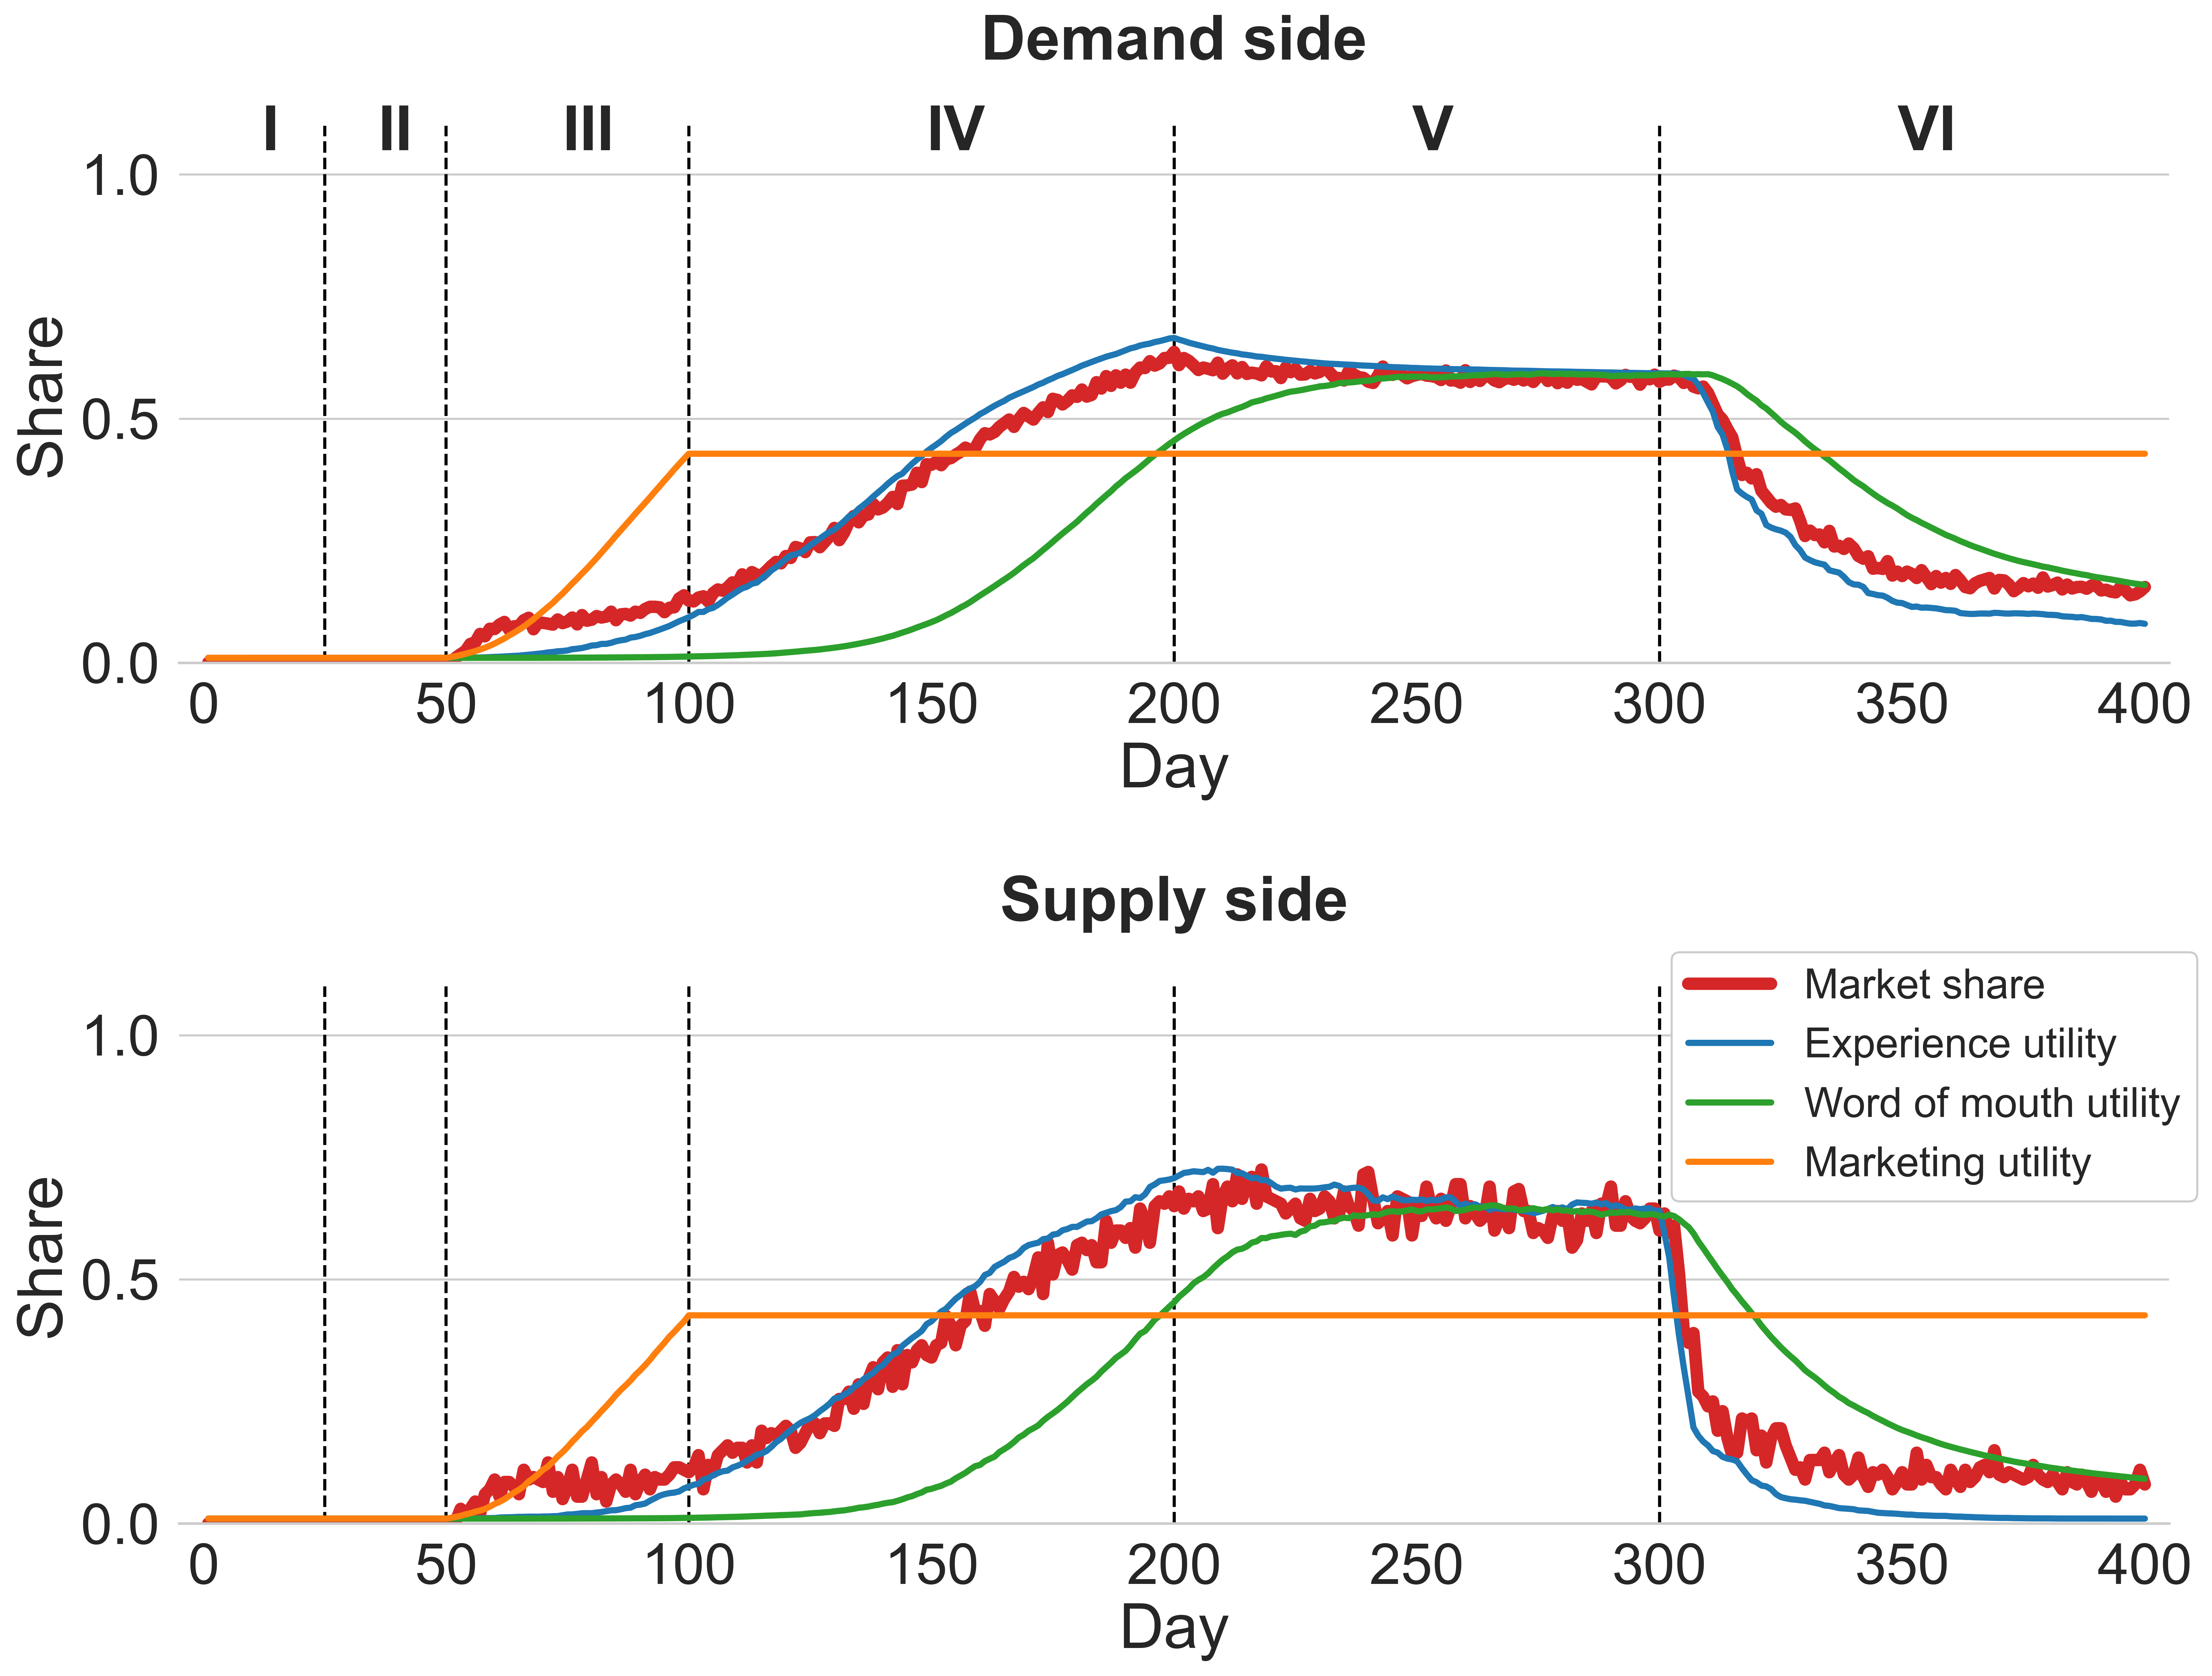

In [101]:
#AAMAS
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=2.5)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,12))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=6, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=3, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=3, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=3, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center', x=0.5, y=1.1);ax[1].set_title('Supply side',fontweight='bold', loc='center', x=0.5, y=1.1)
ax[1].legend(frameon=True,framealpha=1, loc=(0.75,0.6), fontsize=20)#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[0].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
plt.savefig('Fig_aamas1.png')

In [32]:
def smooth(y,w=11,o=1,d=51):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,51)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

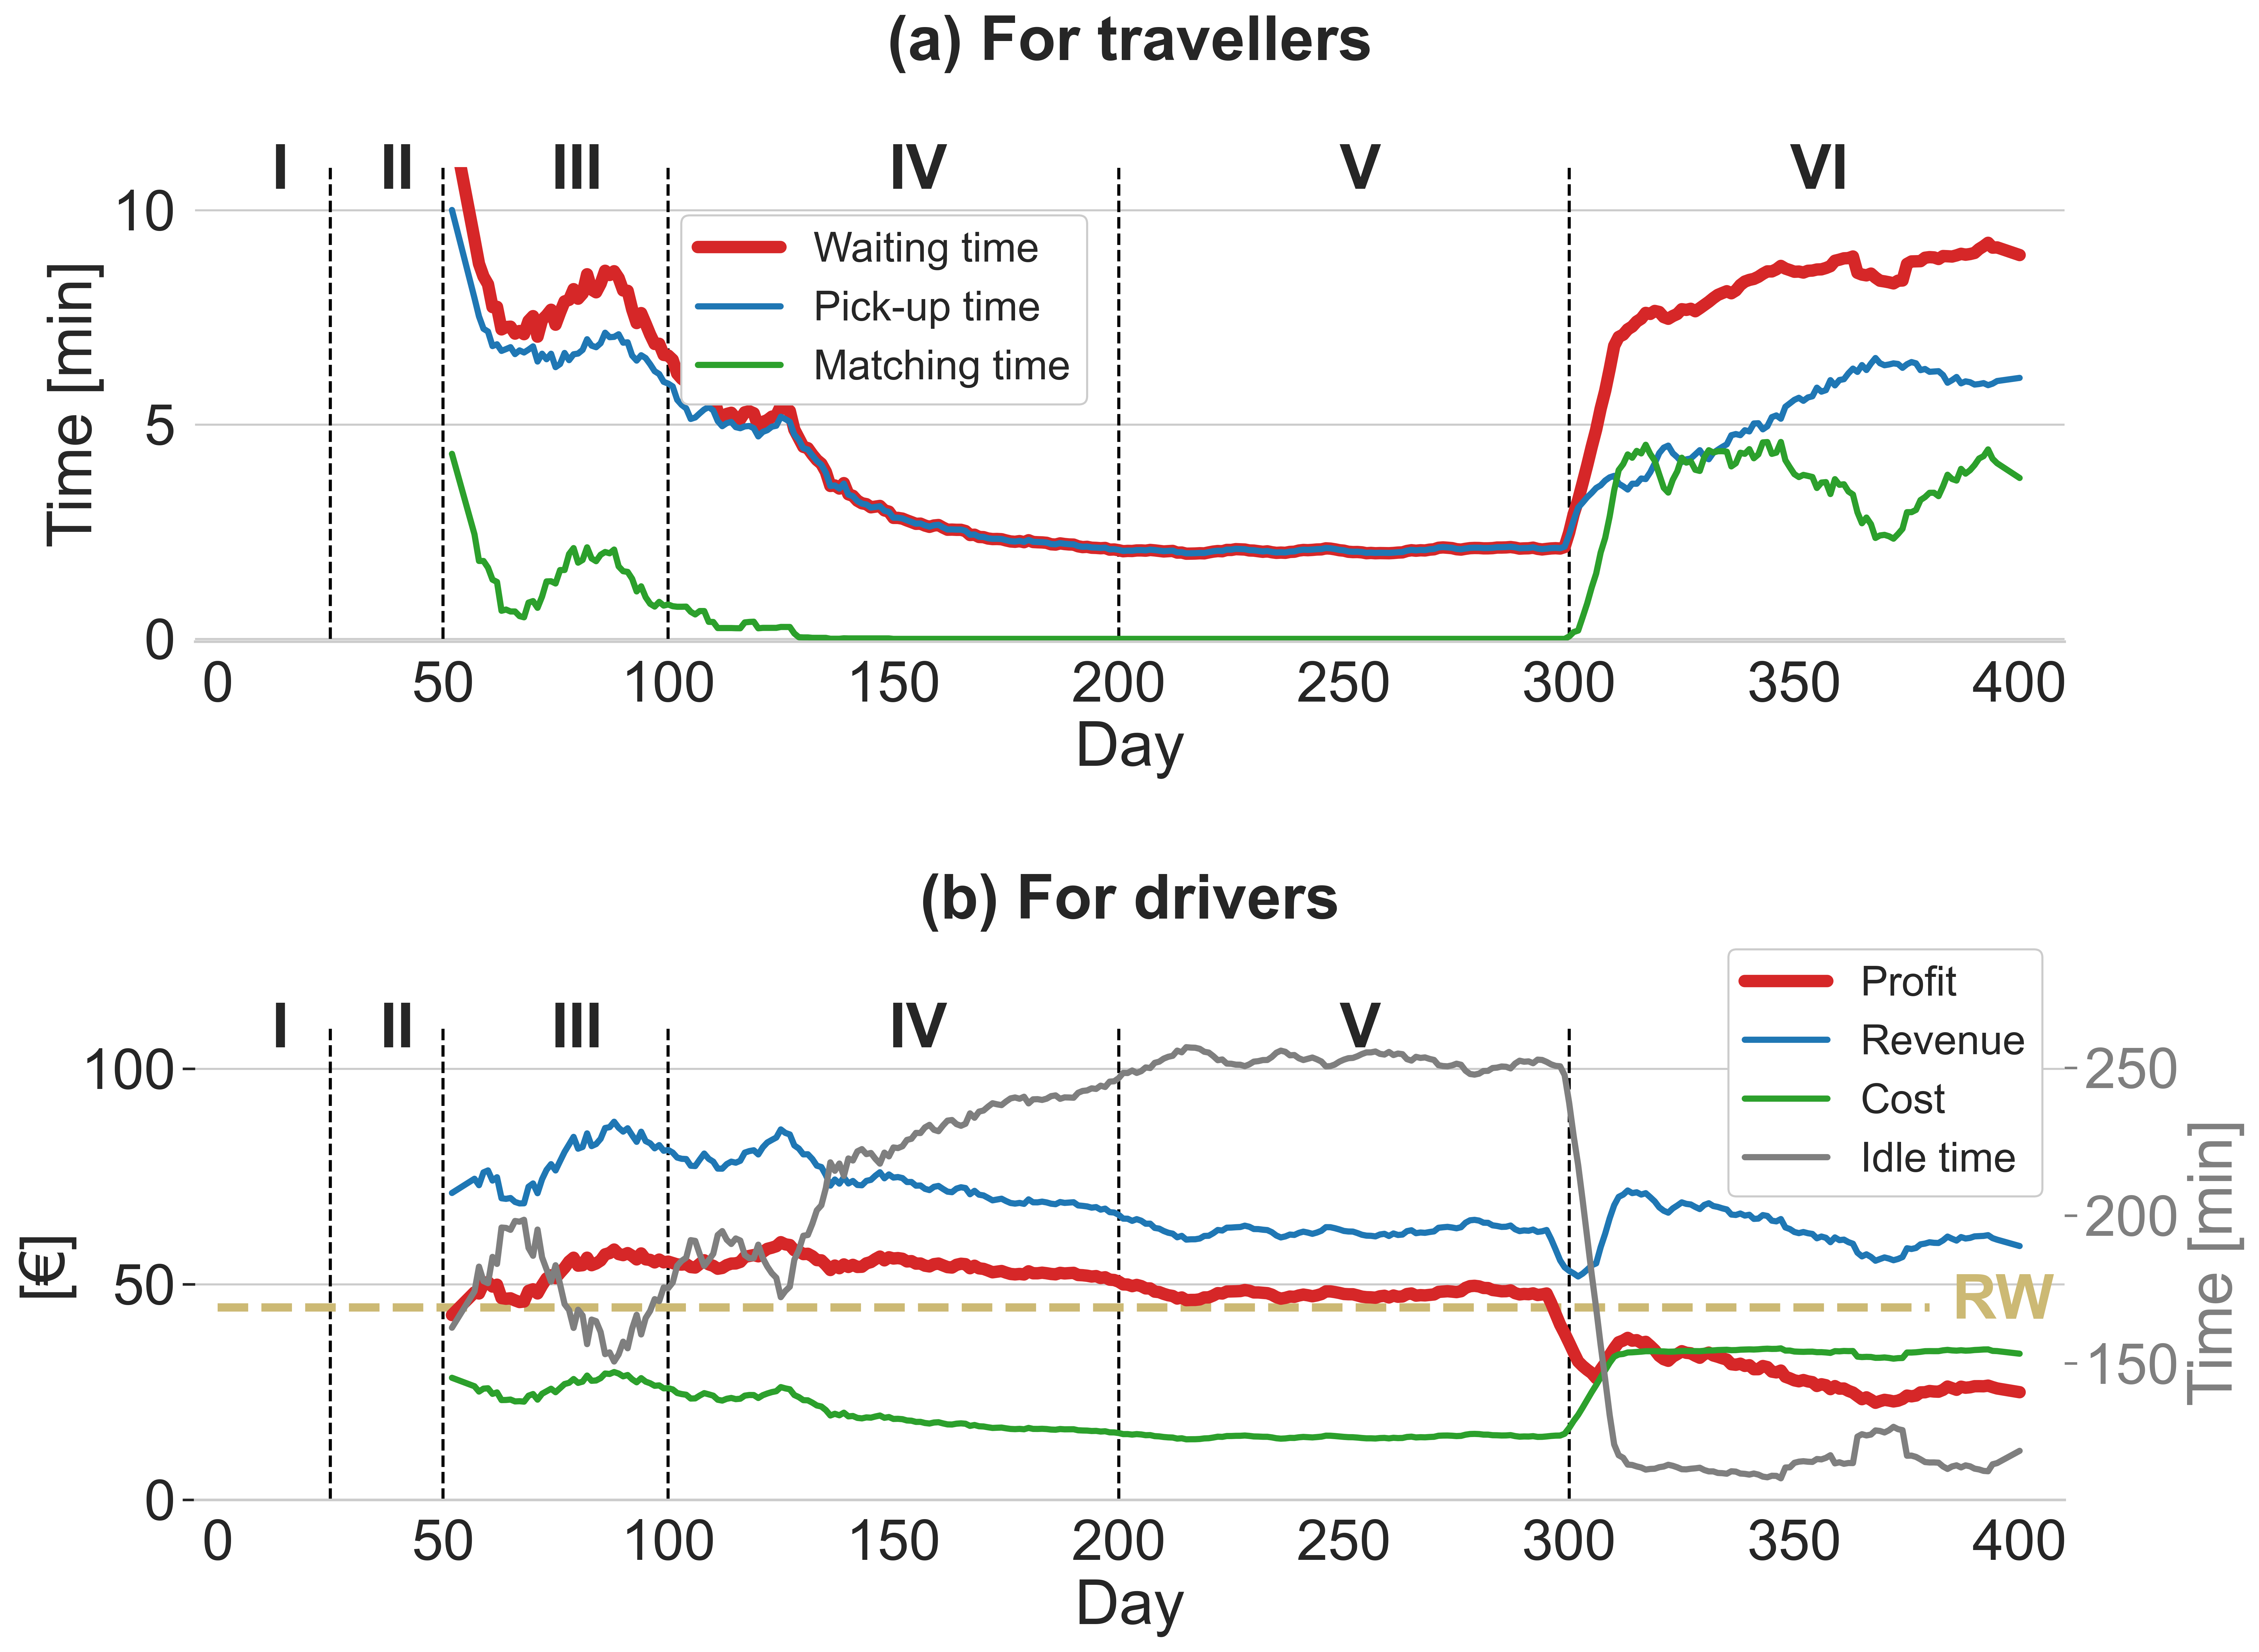

In [33]:
#AAMAS
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=2.5)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(nrows=2, figsize=(16,12))
sns.despine(left=True)
    

x = []
yw = []
yp = []
yi = []
ym = []
yr = []
yprof = []
yc = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    yw.append(df[df.OUT==False].ACTUAL_WT.mean()) # Waiting time per passenger
    ym.append(df[df.OUT==False].MATCHING_T.mean()) # Matching time per passenger
    # yprof.append(df.plat_profit.sum())
    
    df = sim.res[d].veh_exp
    yp.append(df[df.OUT==False].ARRIVES_AT_PICKUP.mean()/(df[df.OUT==False].nRIDES.mean()*60))
    yi.append(df[df.OUT==False].IDLE_TIME.mean()/60)
    yr.append(df[df.OUT==False].REVENUE.mean())
    yprof.append(df[df.OUT==False].ACTUAL_INC.mean())
    yc.append(df[df.OUT==False].COST.mean())



yw = smooth(yw)
ym = smooth(ym)
yp = smooth(yp)
yi = smooth(yi)
yr = smooth(yr)
yprof = smooth(yprof)
yc = smooth(yc)

x = [i for i in range(1,len(yp)+1)]
sns.lineplot(x=x, y=yw, label = 'Waiting time', color='C3',lw=6, ax=ax[0])#, marker='o')
sns.lineplot(x=x, y=yp, label = 'Pick-up time', color='C0',lw=3, ax=ax[0])#, marker='o')
sns.lineplot(x=x, y=ym, label = 'Matching time', color='C2',lw=3, ax=ax[0])#, marker='o')
sns.lineplot(x=x, y=yprof, label = 'Profit', color='C3',lw=6, ax=ax[1])#, marker='o')
sns.lineplot(x=x, y=yr, label = 'Revenue', color='C0',lw=3, ax=ax[1])#, marker='o')
sns.lineplot(x=x, y=yc, label = 'Cost', color='C2',lw=3, ax=ax[1])#, marker='o')ax.twinx()
ax11 = ax[1].twinx()
sns.lineplot(x=x, y=yi, label = 'Idle time', color='C7',lw=3, ax=ax11)#, marker='o')
ax11.set(ylabel='Time [min]')
ax11.grid(b=None)

lines, labels = ax[1].get_legend_handles_labels()
lines2, labels2 = ax11.get_legend_handles_labels()
ax[1].legend(lines + lines2, labels + labels2,framealpha=1, loc=(0.82,0.64), fontsize=20)
ax11.legend().remove()
# ax11.spines['right'].set_color('C7')
ax11.tick_params(axis='y', colors='C7')
ax11.yaxis.label.set_color('C7')

for i in [0,1]:
    ax[i].grid(axis='x')

ax[0].vlines([25, 50, 100, 200, 300], 0, 11, linestyles='dashed', colors='black')
ax[1].vlines([25, 50, 100, 200, 300], 0, 110, linestyles='dashed', colors='black')
ax[1].hlines([params.d2d.res_wage], 0, 380, linestyles='dashed', colors='y', lw=4)
ax[1].annotate('RW', xy =(385,42), fontweight='bold', color='y')

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,10.5),(36,10.5),(74,10.5),(149,10.5),(249,10.5),(349,10.5)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')
for i in range(0,6):
    coords = [(12,105),(36,105),(74,105),(149,105),(249,105),(349,105)]
    ax[1].annotate(value[i], xy =coords[i], fontweight='bold')    
    
ax[0].set(xlabel='Day', ylabel='Time [min]', ylim=(-0.06,11), xlim=(-5,410)); ax[1].set(xlabel='Day', ylabel='[€]', ylim=(0,110),xlim=(-5,410))
ax[0].legend(loc=(0.26,0.5),framealpha=1, fontsize=20)
sns.despine(left=True)


ax[0].set_title('(a) For travellers',fontweight='bold', x=0.5, y=1.2)
ax[1].set_title('(b) For drivers',fontweight='bold', x=0.5, y=1.2)

plt.tight_layout()
# plt.savefig('Fig_aamas3.png')

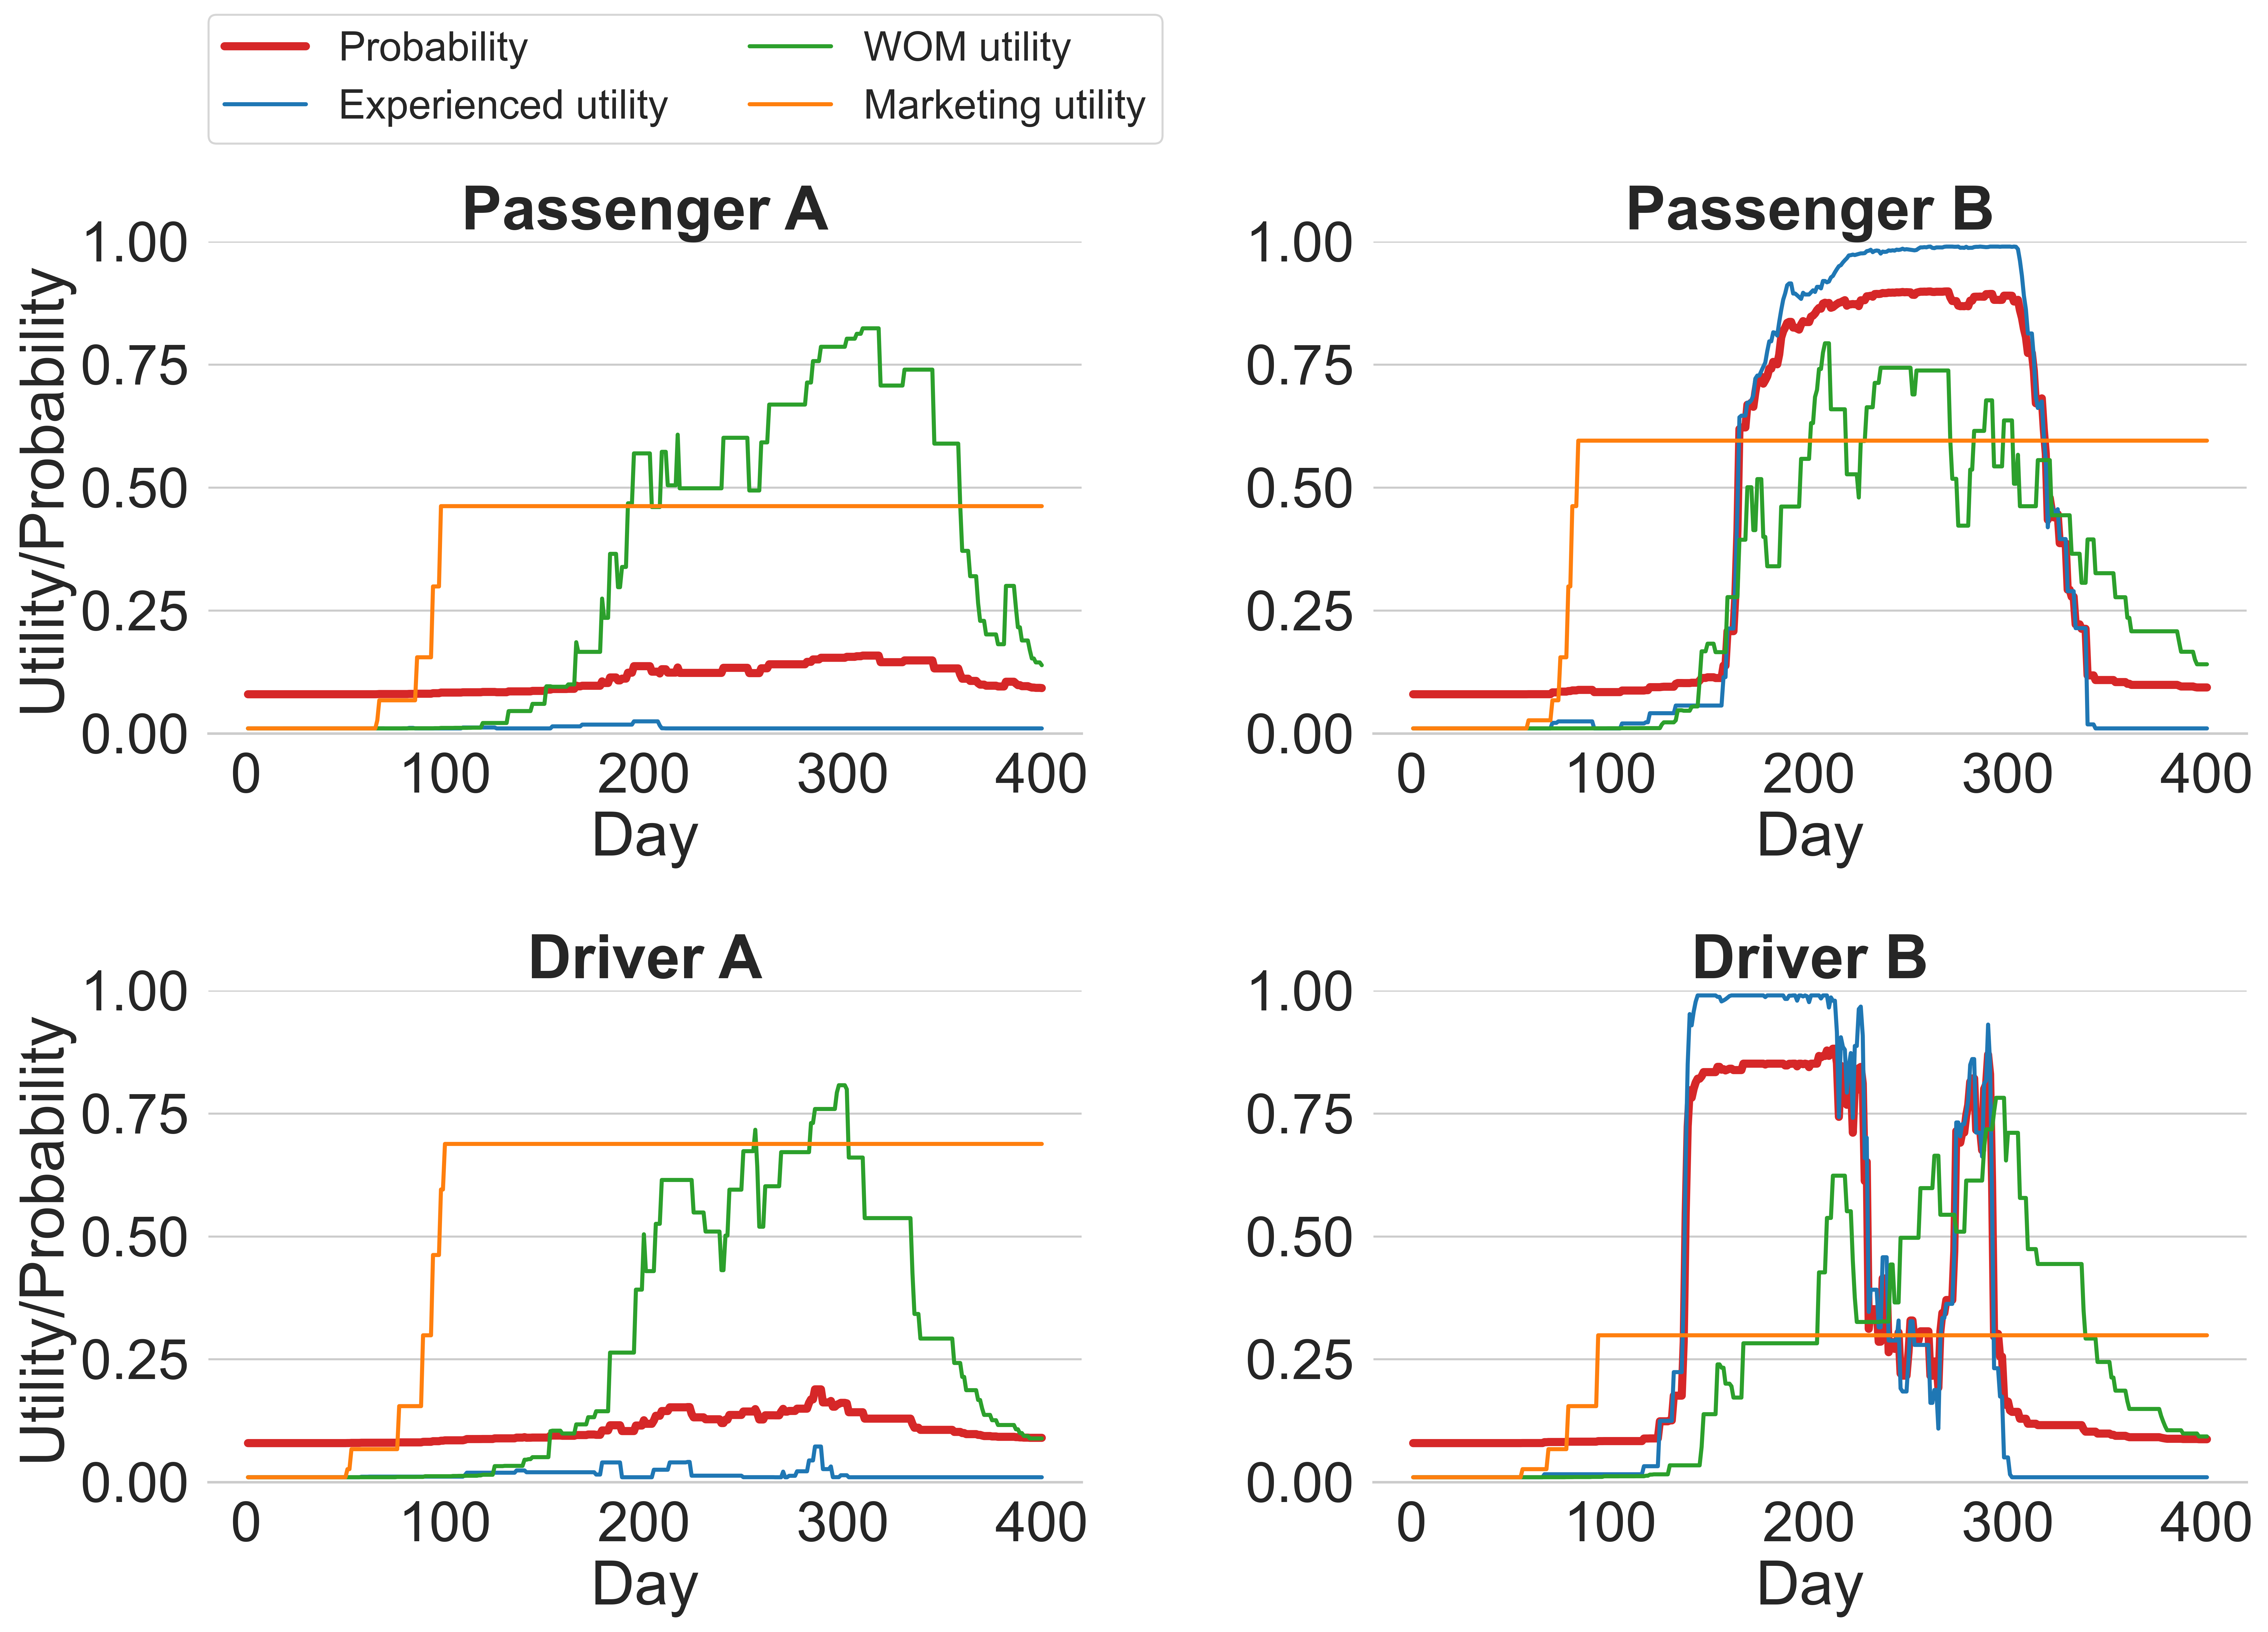

In [99]:
# AAMAS

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=2.5)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
sns.despine(left=True)

ids = [3,8,2,37]
n = 0

for i in range(0,4):
    
    x = []; ye = []; ym = []; yw = []; yu = []; yp = []
    if i<2:
        pax_id = ids[i]
        for d in range(0,sim.params.nD):
            ye.append(sim.res[d].pax_exp.loc[pax_id].EXPERIENCE_U)
            ym.append(sim.res[d].pax_exp.loc[pax_id].MARKETING_U)
            yw.append(sim.res[d].pax_exp.loc[pax_id].WOM_U)
            u = (params.d2d.B_Experience*ye[-1])+(params.d2d.B_Marketing*ym[-1])+(params.d2d.B_WOM*yw[-1])
            yu.append(u)
            yp.append((math.exp(params.d2d.m*u))/(math.exp(params.d2d.m*u) + math.exp(params.d2d.m*0.5)))
    else:
        veh_id = ids[i]
        for d in range(0,sim.params.nD):
            ye.append(sim.res[d].veh_exp.loc[veh_id].EXPERIENCE_U)
            ym.append(sim.res[d].veh_exp.loc[veh_id].MARKETING_U)
            yw.append(sim.res[d].veh_exp.loc[veh_id].WOM_U)
            u = (params.d2d.B_Experience*ye[-1])+(params.d2d.B_Marketing*ym[-1])+(params.d2d.B_WOM*yw[-1])
            yu.append(u)
            yp.append((math.exp(params.d2d.m*u))/(math.exp(params.d2d.m*u) + math.exp(params.d2d.m*0.5)))

    if n<2:
        
        x = [i for i in range(1,len(ye)+1)]
        sns.lineplot(x=x, y=yp, label = 'Probability', color='C3', linewidth=4, ax=ax[0,n])#, marker='o')
        sns.lineplot(x=x, y=ye, label = 'Experienced utility', color='C0', lw=2, ax=ax[0,n])#, marker='o')
        sns.lineplot(x=x, y=yw, label = 'WOM utility', color='C2',lw=2, ax=ax[0,n])#, marker='o')
        sns.lineplot(x=x, y=ym, label = 'Marketing utility', color='C1',lw=2, ax=ax[0,n])#, marker='o')
        # sns.lineplot(x=x, y=yu, label = 'TOTAL_U', ax=ax[n])#, marker='o')

        ax[0,n].set(xlabel='Day', ylim=(0,1))
        ax[0,n].grid(axis='x')
        n += 1
        
    else:
        
        x = [i for i in range(1,len(ye)+1)]
        sns.lineplot(x=x, y=yp, label = 'Probability', color='C3', linewidth=4, ax=ax[1,n-2])#, marker='o')
        sns.lineplot(x=x, y=ye, label = 'Experienced utility', color='C0', lw=2, ax=ax[1,n-2])#, marker='o')
        sns.lineplot(x=x, y=yw, label = 'WOM utility', color='C2',lw=2, ax=ax[1,n-2])#, marker='o')
        sns.lineplot(x=x, y=ym, label = 'Marketing utility', color='C1',lw=2, ax=ax[1,n-2])#, marker='o')
        # sns.lineplot(x=x, y=yu, label = 'TOTAL_U', ax=ax[n])#, marker='o')

        ax[1,n-2].set(xlabel='Day', ylim=(0,1))
        ax[1,n-2].grid(axis='x')
        n += 1
    
    
ax[0,0].legend(loc=(0,1.2), frameon=True, ncol=2, fontsize=20)
ax[0,0].set(ylabel='Utility/Probability'); ax[1,0].set(ylabel='Utility/Probability')
ax[0,1].get_legend().set_visible(False);ax[1,0].get_legend().set_visible(False);ax[1,1].get_legend().set_visible(False)
ax[0,0].set_title('Passenger A',fontweight='bold');ax[0,1].set_title('Passenger B',fontweight='bold');ax[1,0].set_title('Driver A',fontweight='bold');ax[1,1].set_title('Driver B',fontweight='bold')

plt.tight_layout()
plt.savefig('Fig_aamas2.png')

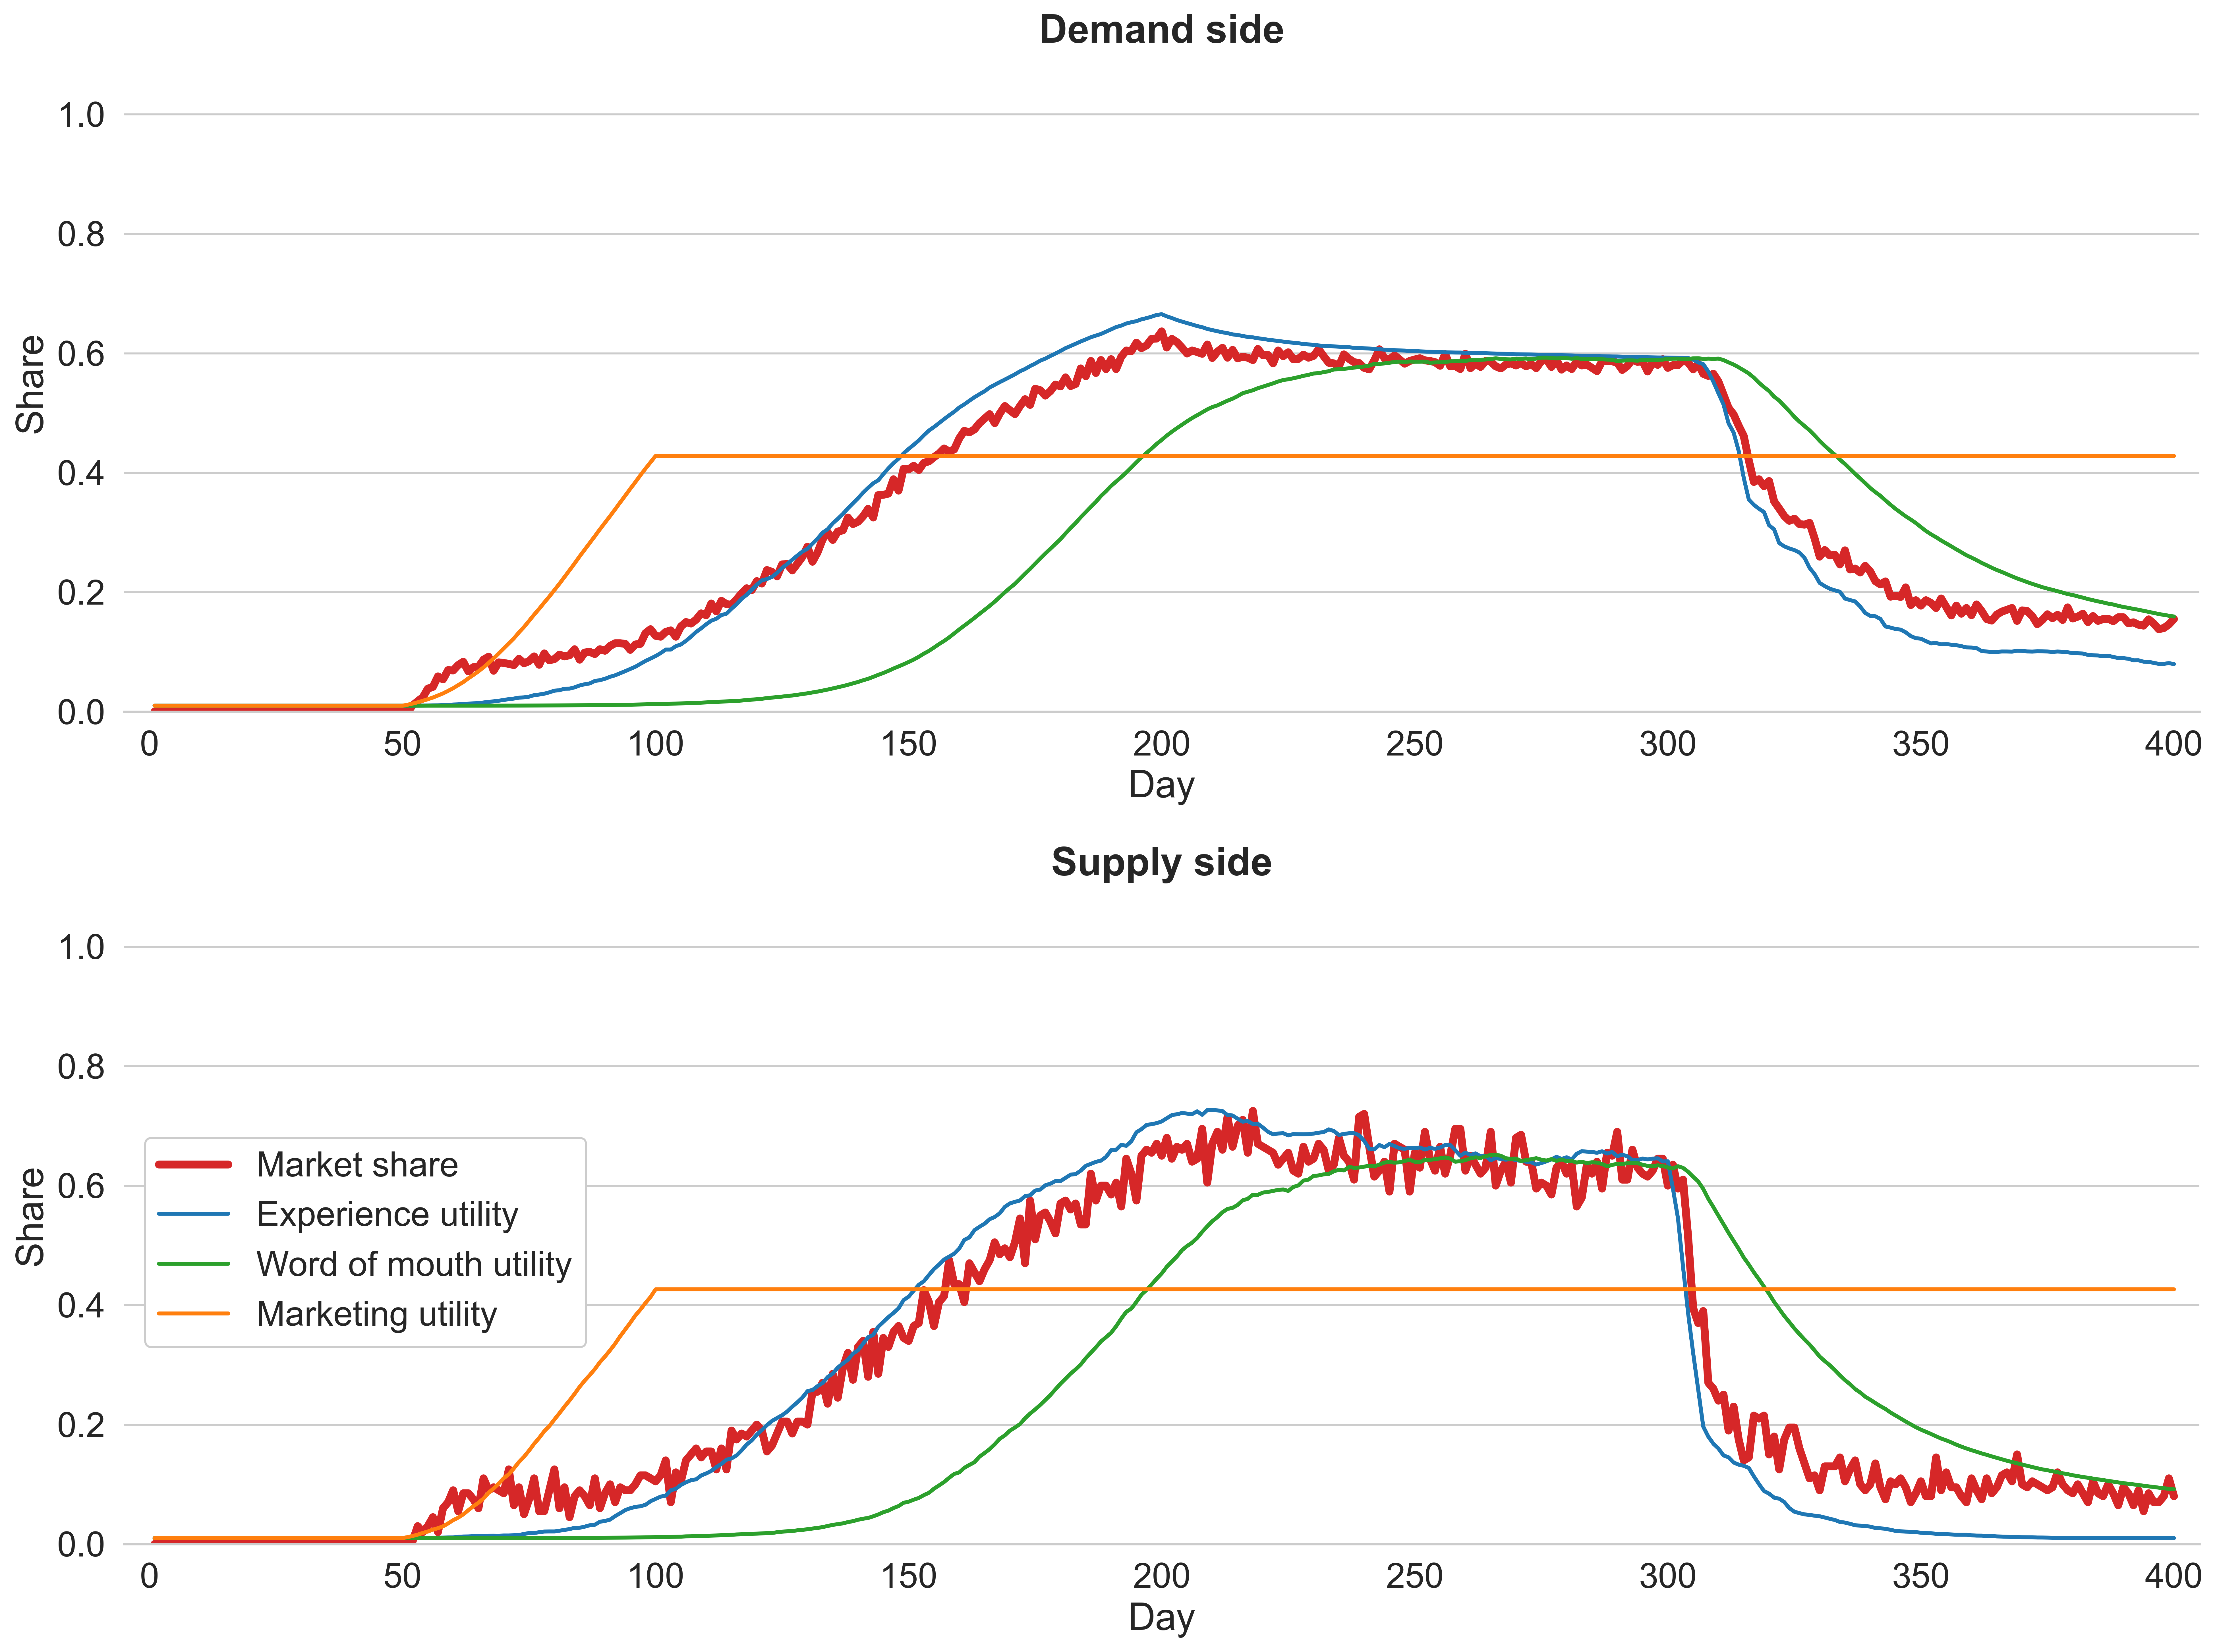

In [7]:
# np 10000, nv 1000, fare 1.2 euro, simtime 4, .d2d.m = 7

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,12))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    # ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,sim.params.nD+5))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=20);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=20)
ax[1].legend(frameon=True,framealpha=1, loc=(0.01,0.3))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[0].get_legend().set_visible(False)
# for i in range(0,6):
#     value = ['I','II','III','IV','V','VI']
#     coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
#     ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1x.png')

In [11]:
def smooth(y,w=17,o=1,d=5):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,d)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

LinAlgError: SVD did not converge in Linear Least Squares

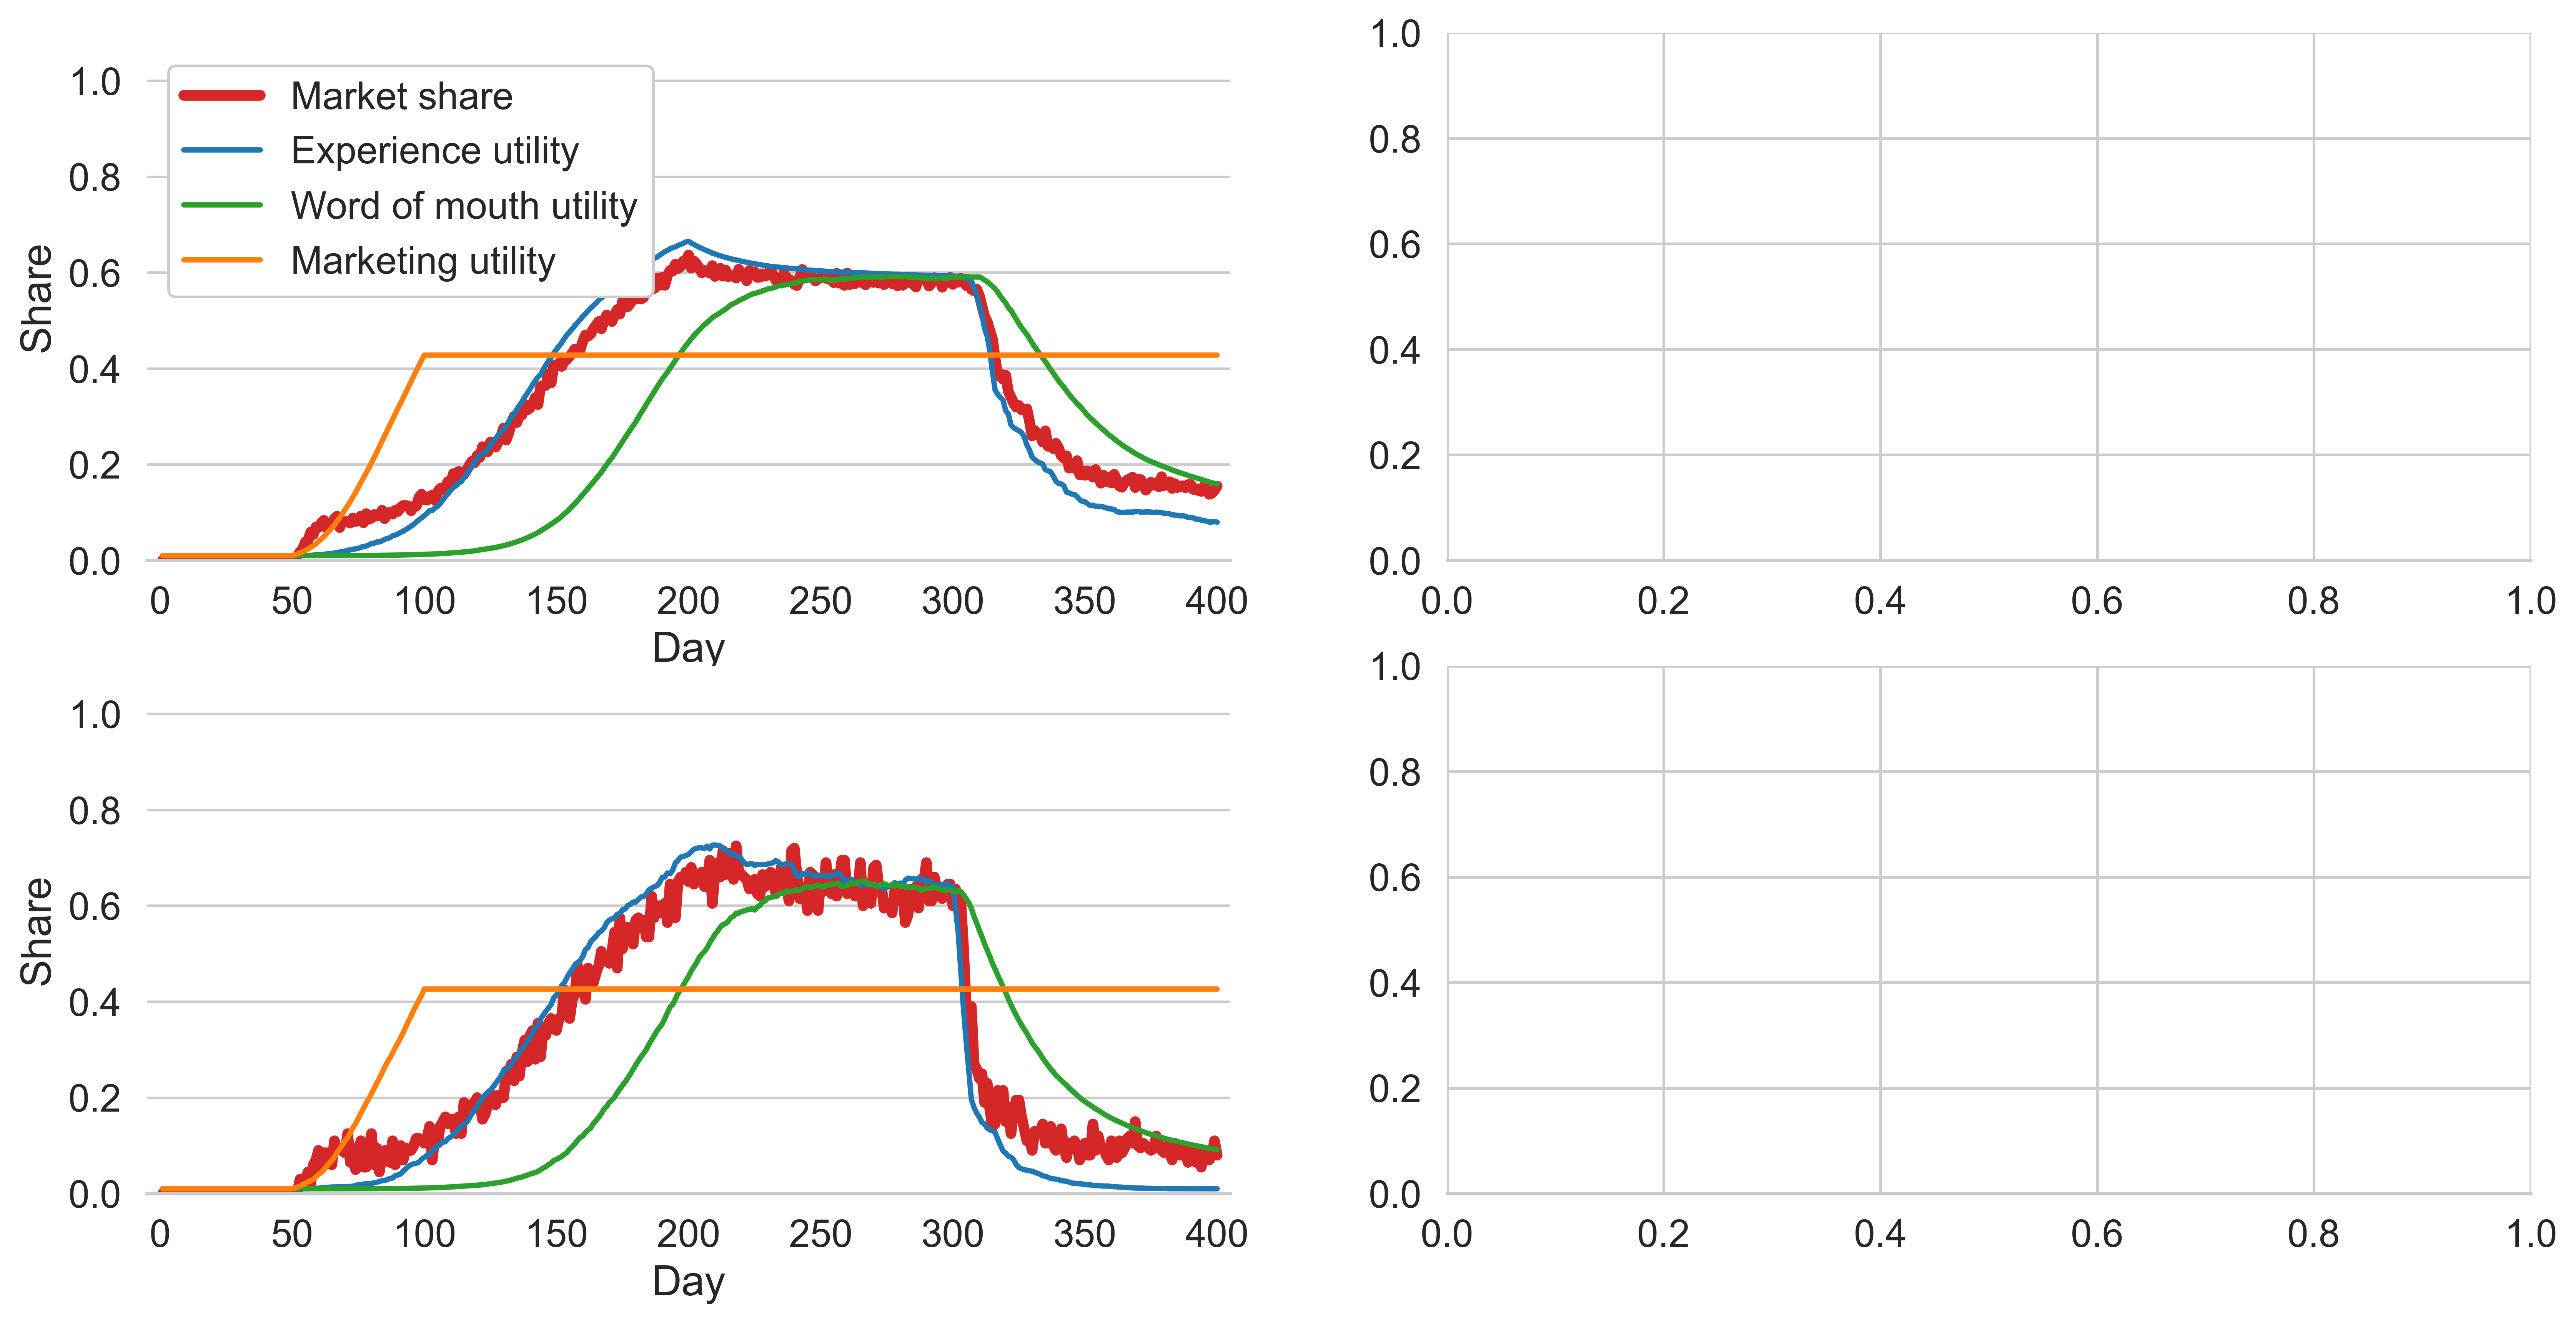

In [12]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.3)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)
d1 = pd.DataFrame()


for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
        d1['P_WOM_U'] = yw; d1['P_MARKETING_U'] = ym
        d1['P_EXPERIENCE_U'] = ye; d1['P_SHARE'] = yms
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
        d1['V_WOM_U'] = yw; d1['V_MARKETING_U'] = ym
        d1['V_EXPERIENCE_U'] = ye; d1['V_SHARE'] = yms
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n][0])
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n][0])
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n][0])
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n][0])
   
    # ax[ax_n][0].vlines([100], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n][0].grid(axis='x')
    ax[ax_n][0].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,sim.params.nD+5))
    
# ax[0][0].set_title('Demand side',fontweight='bold', loc='center',fontsize=20);ax[0][1].set_title('Supply side',fontweight='bold', loc='center',fontsize=20)
ax[0][0].legend(frameon=True,framealpha=1, loc=(0.02,0.5))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1][0].get_legend().set_visible(False)

#===============================================================================================

x = []; yw = []; yp = []; yi = []; ym = []; yr = []; yprof = []; yc = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    yw.append(df[df.OUT==False].ACTUAL_WT.mean()) # Waiting time per passenger
    ym.append(df[df.OUT==False].MATCHING_T.mean()) # Matching time per passenger
    # yprof.append(df.plat_profit.sum())
    
    df = sim.res[d].veh_exp
    yp.append(df[df.OUT==False].ARRIVES_AT_PICKUP.mean()/(df[df.OUT==False].nRIDES.mean()*60))
    yi.append(df[df.OUT==False].IDLE_TIME.mean()/60)
    yr.append(df[df.OUT==False].REVENUE.mean())
    yprof.append(df[df.OUT==False].ACTUAL_INC.mean())
    yc.append(df[df.OUT==False].COST.mean())

yw = smooth(yw); ym = smooth(ym); yp = smooth(yp); yi = smooth(yi)
yr = smooth(yr); yprof = smooth(yprof); yc = smooth(yc)

d2 = pd.DataFrame()
d2['yw'] = yw; d2['ym'] = ym; d2['yp'] = yp; d2['yi'] = yi
d2['yr'] = yr; d2['yprof'] = yprof; d2['yc'] = yc

x = [i for i in range(1,len(yp)+1)]
sns.lineplot(x=x, y=yw, label = 'Waiting time', color='C3',lw=4, ax=ax[0][1])#, marker='o')
sns.lineplot(x=x, y=yp, label = 'Pick-up time', color='C0',lw=2, ax=ax[0][1])#, marker='o')
sns.lineplot(x=x, y=ym, label = 'Matching time', color='C2',lw=2, ax=ax[0][1])#, marker='o')
sns.lineplot(x=x, y=yprof, label = 'Profit', color='C3',lw=4, ax=ax[1][1])#, marker='o')
sns.lineplot(x=x, y=yr, label = 'Revenue', color='C0',lw=2, ax=ax[1][1])#, marker='o')
sns.lineplot(x=x, y=yc, label = 'Cost', color='C2',lw=2, ax=ax[1][1])#, marker='o')ax.twinx()
ax11 = ax[1][1].twinx()
sns.lineplot(x=x, y=yi, label = 'Idle time', color='C7',lw=2, ax=ax11)#, marker='o')
ax11.set(ylabel='Time [min]')
ax11.grid(b=None)

lines, labels = ax[1][1].get_legend_handles_labels()
lines2, labels2 = ax11.get_legend_handles_labels()
ax[1][1].legend(lines + lines2, labels + labels2,framealpha=1, loc=(0.73,0.6))
ax11.legend().remove()
# ax11.spines['right'].set_color('C7')
ax11.tick_params(axis='y', colors='C7')
ax11.yaxis.label.set_color('C7')

for i in [0,1]:
    ax[i][1].grid(axis='x')

# ax[0][1].vlines([100], 0, 11, linestyles='dashed', colors='black')
# ax[1][1].vlines([100], 0, 110, linestyles='dashed', colors='black')
ax[1][1].hlines([params.d2d.res_wage], 0, 380, linestyles='dashed', colors='y', lw=4)
ax[1][1].annotate('RW', xy =(385,42), fontweight='bold', color='y')
  
    
ax[0][1].set(xlabel='Day', ylabel='Time [min]', ylim=(-0.06,11), xlim=(-5,sim.params.nD+5)); ax[1][1].set(xlabel='Day', ylabel='[€]', ylim=(0,200),xlim=(-5,sim.params.nD+5))
ax[0][1].legend(loc=(0.4,0.6),framealpha=1)

ax[0][0].text(x=-80 ,y=0.3, s='Demand side',fontweight='bold',fontsize=20, rotation=90)
ax[1][0].text(x=-80 ,y=0.3, s='Supply side',fontweight='bold',fontsize=20, rotation=90)
sns.despine(left=True)


plt.tight_layout()
# plt.savefig('Fig1x.png')

In [9]:
df_s = pd.DataFrame()
df_d = pd.DataFrame()


for d in range(0,sim.params.nD):
    
    pax_exp = sim.res[d].pax_exp
    df_d.at[d, 'EXPERIENCE_U'] = pax_exp.EXPERIENCE_U.mean()
    df_d.at[d, 'WOM_U'] = pax_exp.WOM_U.mean()
    df_d.at[d, 'MARKETING_U'] = pax_exp.MARKETING_U.mean()
    df_d.at[d, 'OUT'] = pax_exp.OUT.value_counts().get(False, 0)
    
    veh_exp = sim.res[d].veh_exp
    df_s.at[d, 'EXPERIENCE_U'] = veh_exp.EXPERIENCE_U.mean()
    df_s.at[d, 'WOM_U'] = veh_exp.WOM_U.mean()
    df_s.at[d, 'MARKETING_U'] = veh_exp.MARKETING_U.mean()
    df_s.at[d, 'OUT'] = veh_exp.OUT.value_counts().get(False, 0)
    
    
    ld = sim.res[0].pax_exp.columns.values.tolist()
    ldn = [i for i in ld if i not in ['EXPERIENCE_U', 'WOM_U', 'MARKETING_U', 'OUT']]
    for col in ldn:
        df_d.at[d, col] = pax_exp[pax_exp.OUT==False][col].mean()
        
    ls = sim.res[0].veh_exp.columns.values.tolist()
    lsn = [i for i in ls if i not in ['EXPERIENCE_U', 'WOM_U', 'MARKETING_U', 'OUT']]
    for col in lsn:
        df_s.at[d, col] = veh_exp[veh_exp.OUT==False][col].mean()

In [10]:
df_d.to_csv('data/dataframes/disc_50%_demand5.csv')
df_s.to_csv('data/dataframes/disc_50%_supply5.csv')

In [11]:
print(hi)

NameError: name 'hi' is not defined

In [15]:
1248-1231

17

In [18]:
1231*1.05

1292.55